In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

from hyppo.ksample import KSample
from lib.ranks.dst import Permuter
from lib.ranks.dst import Limiter
from lib.ranks.rank import rank

In [2]:
FIRST_SIZE = 40
SECOND_SIZE = 20
DIMENSION = 2
SEED = 3724
DISTRIBUTION = 1000

PVALUE = 20

# Normal distribution

## Equal covariation matrices different means

In [3]:
def normal_mean(sizes, means, dim=2):
    result = []
    for size, mean in zip(sizes, means):
        sample = np.random.multivariate_normal(
            mean + np.zeros(dim),
            np.identity(dim),
            size=size)
        result.append(sample)
    
    return result

### Heller test

In [4]:
%%time
criteria = KSample(indep_test="HHG")
permuter = Permuter(
    KSample(indep_test="HHG").statistic,
    DIMENSION,
    FIRST_SIZE, SECOND_SIZE,
    seed=SEED
)
permuter.distribution(DISTRIBUTION, 
    seeds=[2342, 1234, 8578, 4326])
;

CPU times: user 14.2 ms, sys: 62.6 ms, total: 76.8 ms
Wall time: 2.37 s


''

#### Different means

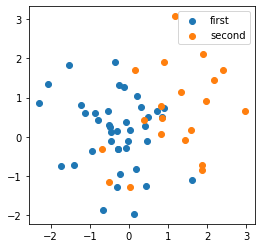

In [5]:
first, second = normal_mean(
    [FIRST_SIZE, SECOND_SIZE],
    [0, 1],
    dim=DIMENSION
)

plt.scatter(first[:, 0], first[:, 1], label="first")
plt.scatter(second[:, 0], second[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

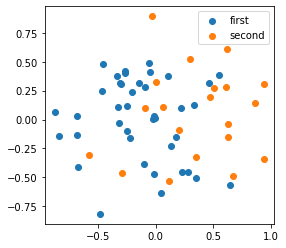

In [6]:
rfirst, rsecond = rank([first, second], permuter.ranks)

plt.scatter(rfirst[:, 0], rfirst[:, 1], label="first")
plt.scatter(rsecond[:, 0], rsecond[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

In [7]:
%%time
pvr = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [FIRST_SIZE, SECOND_SIZE],
        [0, 1],
        dim=DIMENSION
    )
    pvr.append(permuter.test(first, second)[1])

pvr = sorted(pvr)

100%|██████████| 20/20 [00:00<00:00, 118.95it/s]

CPU times: user 152 ms, sys: 21.3 ms, total: 173 ms
Wall time: 171 ms


In [8]:
%%time
pvo = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [FIRST_SIZE, SECOND_SIZE],
        [0, 1],
        dim=DIMENSION
    )
    pvo.append(criteria.test(first, second)[1])
    
pvo = sorted(pvo)

100%|██████████| 20/20 [01:12<00:00,  3.62s/it]

CPU times: user 1min 12s, sys: 474 ms, total: 1min 12s
Wall time: 1min 12s


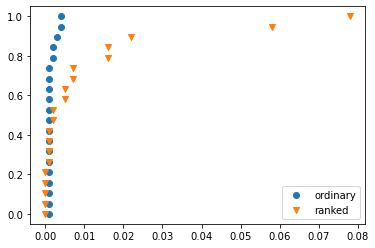

In [9]:
x = np.linspace(0, 1, PVALUE)
plt.scatter(pvo, x, label="ordinary", marker="o")
plt.scatter(pvr, x, label="ranked", marker="v")
# plt.plot(x, x)
plt.legend()
# plt.gca().set_aspect('equal', 'box')
plt.show()

#### Equal means

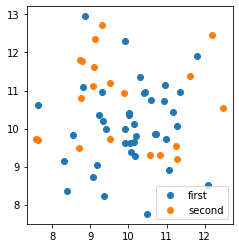

In [10]:
first, second = normal_mean(
    [FIRST_SIZE, SECOND_SIZE],
    [10, 10],
    dim=DIMENSION
)

plt.scatter(first[:, 0], first[:, 1], label="first")
plt.scatter(second[:, 0], second[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

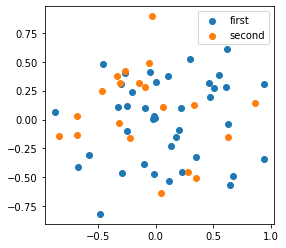

In [11]:
rfirst, rsecond = rank([first, second], permuter.ranks)

plt.scatter(rfirst[:, 0], rfirst[:, 1], label="first")
plt.scatter(rsecond[:, 0], rsecond[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

In [ ]:
stats = []
for i in tqdm.tqdm(range(PVALUE * 50)):
    first, second = normal_mean(
        [FIRST_SIZE, SECOND_SIZE],
        [10, 10],
        dim=DIMENSION
    )
    stats.append(permuter.statistic(first, second))

In [ ]:
sns.histplot(
    x="value",
    hue="variable",
    data=pd.DataFrame(
        columns=["limit", "sample"],
        data=zip(permuter.dst, stats)
    ).melt(),
    alpha=0.3,
    stat="density"
)

In [12]:
%%time
pvr = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [FIRST_SIZE, SECOND_SIZE],
        [10, 10],
        dim=DIMENSION
    )
    pvr.append(permuter.test(first, second)[1])

pvr = sorted(pvr)

100%|██████████| 20/20 [00:00<00:00, 152.70it/s]

CPU times: user 131 ms, sys: 3.3 ms, total: 134 ms
Wall time: 133 ms


In [14]:
%%time
pvo = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [FIRST_SIZE, SECOND_SIZE],
        [10, 10],
        dim=DIMENSION
    )
    pvo.append(criteria.test(first, second)[1])
    
pvo = sorted(pvo)

100%|██████████| 20/20 [01:13<00:00,  3.66s/it]

CPU times: user 1min 12s, sys: 331 ms, total: 1min 13s
Wall time: 1min 13s


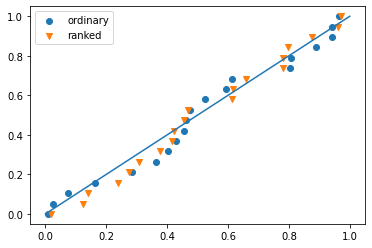

In [15]:
x = np.linspace(0, 1, PVALUE)
plt.scatter(pvo, x, label="ordinary", marker="o")
plt.scatter(pvr, x, label="ranked", marker="v")
plt.plot(x, x)
plt.legend()
# plt.gca().set_aspect('equal', 'box')
plt.show()